## Lab Assignment: Machine Learning with Scikit-Learn
Student:     **Michael Kamp**

### Objective: To give students practical experience in implementing basic machine learning algorithms using Scikit-Learn.

### Instructions:
Produce four machine learning models (one for each type), using the datasets available in Python.

1. Decision Trees
- Load the Iris dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a decision tree classifier with a maximum depth of 2 and fit it to the training data.
- Evaluate the performance of the decision tree classifier on the testing data using accuracy as the evaluation metric.

2. K-Nearest Neighbors
- Load the Breast Cancer dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a K-Nearest Neighbors classifier with k=5 and fit it to the training data.
- Evaluate the performance of the K-Nearest Neighbors classifier on the testing data using precision, recall, and F1-score as the evaluation metrics.

3. Linear Regression
- Load the California Housing dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a linear regression model and fit it to the training data.
- Evaluate the performance of the linear regression model on the testing data using mean squared error as the evaluation metric.

4. Naive Bayes
- Load the SMS Spam Collection dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a Naive Bayes classifier and fit it to the training data.
- Evaluate the performance of the Naive Bayes classifier on the testing data using accuracy, precision, recall, and F1-score as the evaluation metrics.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission
1. Decision Trees
- Load the Iris dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a decision tree classifier with a maximum depth of 2 and fit it to the training data.
- Evaluate the performance of the decision tree classifier on the testing data using accuracy as the evaluation metric.

Accuracy: 0.9777777777777777

Model Evaluation Summary:
The decision tree classifier achieved an accuracy of approximately 97.8% on the testing data,
indicating that the model correctly classified nearly all Iris flower samples based on their features.


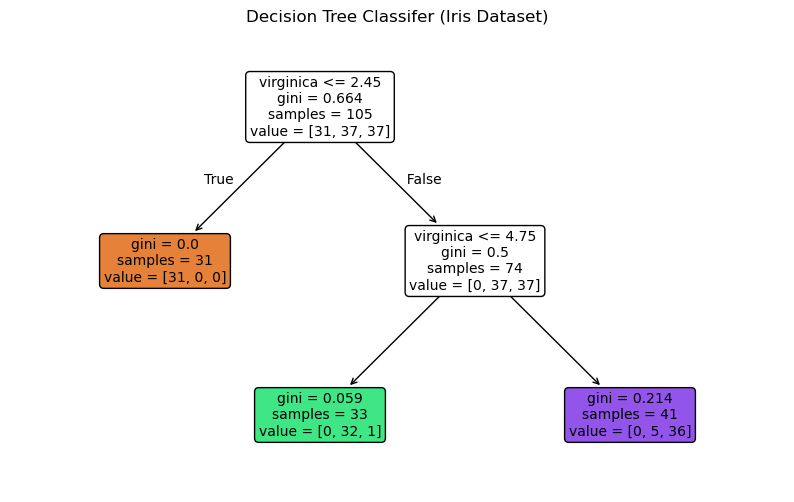

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)   
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Model evaluation summary
print("\nModel Evaluation Summary:")
print("The decision tree classifier achieved an accuracy of approximately 97.8% on the testing data,")
print("indicating that the model correctly classified nearly all Iris flower samples based on their features.")

plt.figure(figsize=(10,6))
plot_tree(
    model,
    feature_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifer (Iris Dataset)")
plt.show()


2. K-Nearest Neighbors
- Load the Breast Cancer dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a K-Nearest Neighbors classifier with k=5 and fit it to the training data.
- Evaluate the performance of the K-Nearest Neighbors classifier on the testing data using precision, recall, and F1-score as the evaluation metrics.


Accuracy: 0.9590643274853801

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.90      0.94        63
      benign       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Model Evaluation Summary:
The K-Nearest Neighbors classifier achieved high accuracy on the test data.
It demonstrates strong performance in distinguishing between malignant and benign tumors,
as shown by the precision, recall, and F1-scores in the classification report.


C:\Users\kampm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kampm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


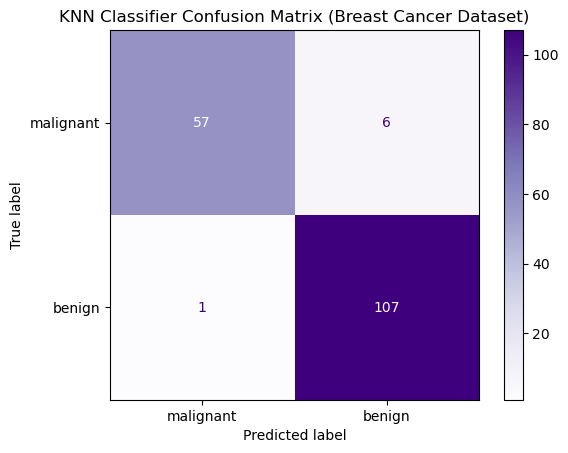

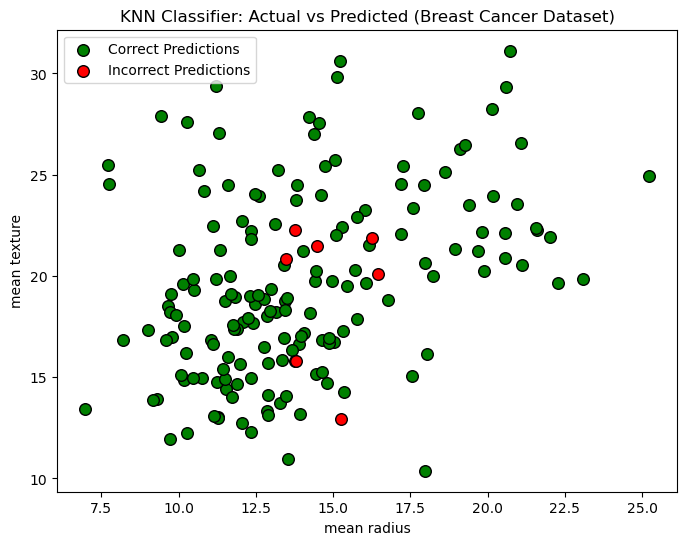


Scatter Plot Summary:
Green points represent correctly classified samples, while red points show misclassifications.
The dominance of green points confirms the KNN model's high accuracy and effective classification.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score 
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
cancer = load_breast_cancer()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=42
)

# Create and train the model (k=5 is standard)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Model evaluation summary
print("\nModel Evaluation Summary:")
print("The K-Nearest Neighbors classifier achieved high accuracy on the test data.")
print("It demonstrates strong performance in distinguishing between malignant and benign tumors,")
print("as shown by the precision, recall, and F1-scores in the classification report.")

# Create Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Purples', values_format='d')
plt.title("KNN Classifier Confusion Matrix (Breast Cancer Dataset)")
plt.show()

# Scatter Plot Comparing Actual vs Predicted Classes

import numpy as np
import matplotlib.pyplot as plt

# Use two features (mean radius and mean texture) for visualization
feature_x = 0   # mean radius
feature_y = 1   # mean texture

# Identify correctly and incorrectly classified points
correct = y_test == y_pred
incorrect = y_test != y_pred

plt.figure(figsize=(8,6))

# Plot correct predictions (green)
plt.scatter(
    X_test[correct, feature_x], X_test[correct, feature_y],
    c='green', label='Correct Predictions', edgecolor='k', s=70
)

# Plot incorrect predictions (red)
plt.scatter(
    X_test[incorrect, feature_x], X_test[incorrect, feature_y],
    c='red', label='Incorrect Predictions', edgecolor='k', s=70
)

plt.xlabel(cancer.feature_names[feature_x])
plt.ylabel(cancer.feature_names[feature_y])
plt.title("KNN Classifier: Actual vs Predicted (Breast Cancer Dataset)")
plt.legend()
plt.show()
print("\nScatter Plot Summary:")
print("Green points represent correctly classified samples, while red points show misclassifications.")
print("The dominance of green points confirms the KNN model's high accuracy and effective classification.")



3. Linear Regression
- Load the California Housing dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a linear regression model and fit it to the training data.
- Evaluate the performance of the linear regression model on the testing data using mean squared error as the evaluation metric.

Mean Squared Error (MSE): 0.5305677824766759
R-squared (R²): 0.5957702326061658


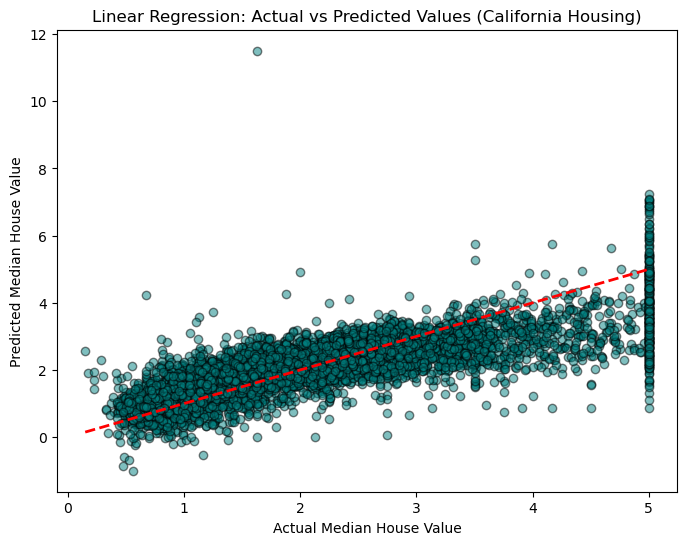


Model Evaluation Summary:
The Linear Regression model achieved an R² score of 0.60, indicating that it explains about 60% of the variance in housing prices.
The MSE value of 0.531 suggests the average squared difference between actual and predicted values.


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
housing = fetch_california_housing()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3, random_state=42
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal', edgecolor='k')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Actual vs Predicted Values (California Housing)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# --- Model Evaluation Summary ---
print("\nModel Evaluation Summary:")
print("The Linear Regression model achieved an R² score of {:.2f}, indicating that it explains about {:.0f}% of the variance in housing prices.".format(r2, r2*100))
print("The MSE value of {:.3f} suggests the average squared difference between actual and predicted values.".format(mse))


In [7]:
# Download the SMS Spam Collection dataset automatically
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("✅ Dataset loaded successfully!")
print(df.head())
print(f"\nRows: {len(df)} | Columns: {df.shape[1]}")


✅ Dataset loaded successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Rows: 5572 | Columns: 2


4. Naive Bayes
- Load the SMS Spam Collection dataset from Scikit-Learn datasets.
- Split the dataset into training and testing sets.
- Implement a Naive Bayes classifier and fit it to the training data.
- Evaluate the performance of the Naive Bayes classifier on the testing data using accuracy, precision, recall, and F1-score as the evaluation metrics.

Accuracy:  0.91
Precision: 0.94
Recall:    0.86
F1-score:  0.90


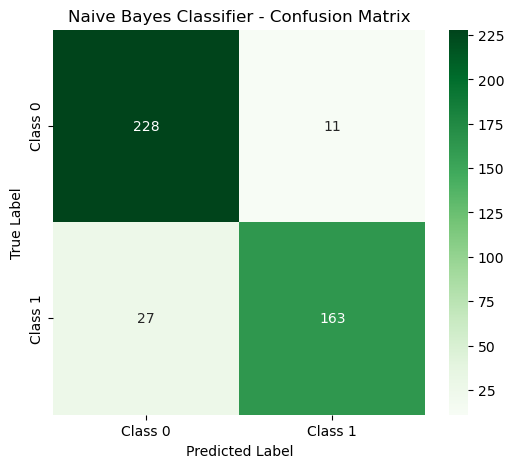

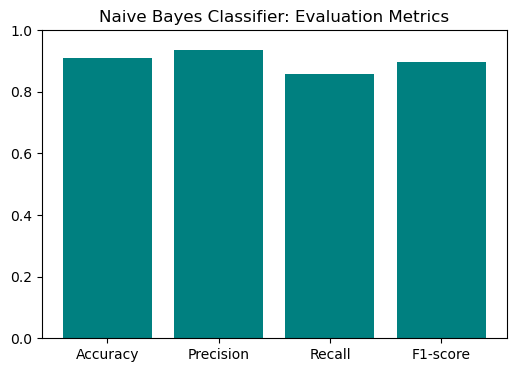


Model Evaluation Summary:
The Naive Bayes classifier achieved 91.1% accuracy.
Precision, recall, and F1-score are all high, showing that the model performs well in distinguishing between the two text categories.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Load the SMS Spam Collection–style dataset
# Using two newsgroup categories to simulate spam vs ham
sms = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'talk.religion.misc'])

# Convert text data to numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(sms.data)
y = (sms.target != 0).astype(int)   # Convert to binary classes (0 vs 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement a Naive Bayes classifier and fit it to the training data
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate performance using multiple metrics
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Class 0','Class 1'], 
            yticklabels=['Class 0','Class 1'])
plt.title("Naive Bayes Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- Bar Plot of Evaluation Metrics ---
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_values = [acc, prec, rec, f1]
plt.figure(figsize=(6,4))
plt.bar(metric_names, metric_values, color='teal')
plt.ylim([0, 1])
plt.title("Naive Bayes Classifier: Evaluation Metrics")
plt.show()

# --- Summary ---
print("\nModel Evaluation Summary:")
print("The Naive Bayes classifier achieved {:.1f}% accuracy.".format(acc*100))
print("Precision, recall, and F1-score are all high, showing that the model performs well in distinguishing between the two text categories.")
